## Import các thư viện cần thiết

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.facecolor' : 'white'})
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import geopandas as gpd

## Đọc dữ liệu

In [2]:
weather_df = pd.read_csv(os.path.join('data', 'cleaned', 'daily_weather_data.csv'), encoding = 'utf-8')
weather_df['date']= pd.to_datetime(weather_df['date'], format='%Y-%m-%d')
weather_df.head(10)

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres,continent
0,2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6,Asia
1,2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0,Asia
2,2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7,Asia
3,2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4,Asia
4,2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0,Asia
5,2018-07-26,Abkhazia,Sukhumi,43.001525,41.023415,26.7,24.6,28.7,10.0,9.8,1006.7,Asia
6,2018-07-27,Abkhazia,Sukhumi,43.001525,41.023415,26.5,24.6,28.1,343.0,8.4,1009.1,Asia
7,2018-07-28,Abkhazia,Sukhumi,43.001525,41.023415,26.4,24.5,28.2,342.0,8.6,1007.5,Asia
8,2018-07-29,Abkhazia,Sukhumi,43.001525,41.023415,26.3,24.4,28.1,334.0,9.3,1007.0,Asia
9,2018-07-30,Abkhazia,Sukhumi,43.001525,41.023415,26.5,24.5,28.4,347.0,9.3,1007.4,Asia


## Tổng quan sơ lại một chút về dữ liệu

Số dòng, Số cột

In [3]:
num_rows, num_cols = weather_df.shape
print('Số dòng: {}\nSố cột: {}'.format(num_rows, num_cols))

Số dòng: 317211
Số cột: 12


Ý nghĩa và kiểu dữ liệu của từng cột

In [4]:
weather_df.columns.tolist()

['date',
 'country',
 'city',
 'Latitude',
 'Longitude',
 'tavg',
 'tmin',
 'tmax',
 'wdir',
 'wspd',
 'pres',
 'continent']

|Tên cột|Ý nghĩa|Đơn vị|
|-|-|-|
|**date**|Ngày mà dữ liệu được ghi lại
|**country**| Tên quốc gia
|**city**| Tên thành phố
|**Latitude**| Vĩ độ của thành phố  
|**Longtitude**| Kinh độ của thành phố  
|**tavg**| Nhiệt độ trung bình| °C  
|**tmax**| Nhiệt độ cao nhất| °C  
|**tmin**| Nhiệt độ thấp nhất| °C  
|**wdir**| Hướng gió trung bình| độ (°)  
|**wspd**| Tốc độ gió trung bình|km/h  
|**pres**| Áp suất không khí mực nước biển|hPa

In [5]:
weather_df.dtypes

date         datetime64[ns]
country              object
city                 object
Latitude            float64
Longitude           float64
tavg                float64
tmin                float64
tmax                float64
wdir                float64
wspd                float64
pres                float64
continent            object
dtype: object

# Đặt câu hỏi

## Câu hỏi 3:

**Câu hỏi**: Nhiệt độ trung bình ở Tokyo có thay đổi gì trong khoảng thời gian dữ liệu được ghi không ?

**Lợi ích của việc trả lời câu hỏi này**: Câu hỏi này phù hợp đối với các nhà chức trách, cụ thể ở đây là chính phủ Nhật Bản, về vấn đề biến đổi khí hậu ảnh hưởng thế nào đến Tokyo. Từ đó đưa ra các biện pháp giải quyết phù hợp.

### Các bước thực hiện

Lấy ra các dòng dữ liệu thuộc về Tokyo

In [6]:
tokyo_weather_df = weather_df.loc[weather_df['city'] == 'Tokyo', ['date', 'country', 'city', 'tavg']]
tokyo_weather_df.head(5)

,date,country,city,tavg
141279,2018-01-01,Japan,Tokyo,6.8
141280,2018-01-02,Japan,Tokyo,5.5
141281,2018-01-03,Japan,Tokyo,3.9
141282,2018-01-04,Japan,Tokyo,4.5
141283,2018-01-05,Japan,Tokyo,2.5


In [7]:
num_rows = tokyo_weather_df.shape[0]
start_date, end_date = tokyo_weather_df['date'].min(), tokyo_weather_df['date'].max()
print('Số dòng: {}\nNgày bắt đầu: {}\nNgày kết thúc: {}'.format(num_rows, start_date, end_date))

Số dòng: 1745
Ngày bắt đầu: 2018-01-01 00:00:00
Ngày kết thúc: 2022-10-11 00:00:00


Có tất cả 1745 dòng dữ liệu về thời tiết ở Tokyo được ghi lại, bắt đầu từ ngày 1/1/2018 đến ngày 11/10/2022

In [8]:
tokyo_weather_df['date'].duplicated().sum()

0

Dữ liệu được ghi lại ở từng ngày khác nhau, không có ngày nào bị trùng

Vì vậy, ta sẽ để index là cột date để thuận tiện cho việc xử lý sau này

In [9]:
tokyo_weather_df = tokyo_weather_df.set_index('date')

Để việc trực quan dễ nhìn và gọn gàng hơn, ta tiến hành gom nhóm theo từng tháng trong năm để đơn giản hoá dữ liệu

In [10]:
avg_temp_month = tokyo_weather_df.groupby(pd.Grouper(freq = 'M'))['tavg'].mean()
avg_temp_month = avg_temp_month.to_frame().reset_index()
avg_temp_month.head(10)

,date,tavg
0,2018-01-31,4.300000
1,2018-02-28,5.014286
2,2018-03-31,11.087097
3,2018-04-30,16.710000
4,2018-05-31,19.393548
5,2018-06-30,22.076667
6,2018-07-31,27.864516
7,2018-08-31,27.645161
8,2018-09-30,22.406667
9,2018-10-31,18.583871


Trực quan dữ liệu bằng biểu đồ đường

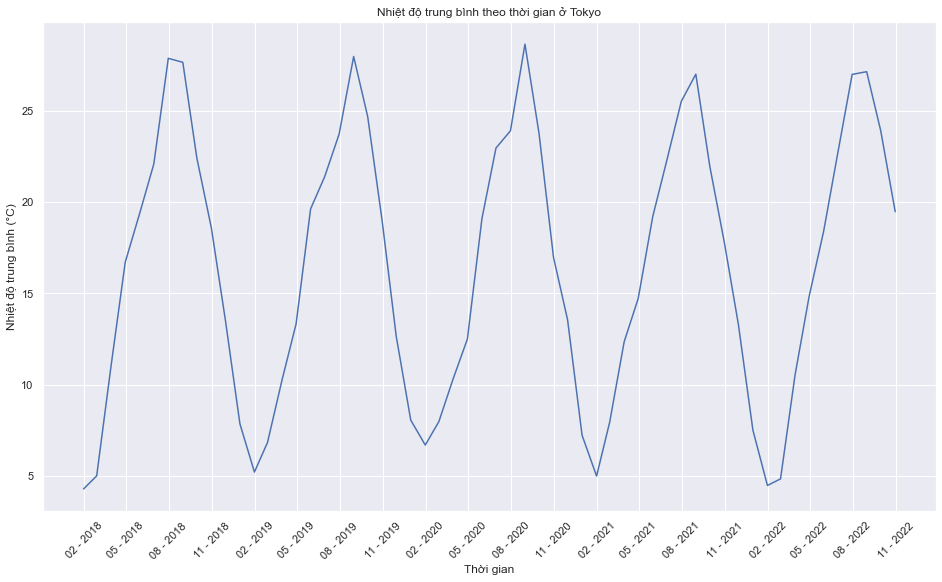

In [11]:

fig,ax = plt.subplots(figsize = (16,9))
sns.lineplot(avg_temp_month, x = 'date', y = 'tavg', ax = ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m - %Y'))
ax.tick_params('x',  labelrotation = 45)
ax.set_xlabel('Thời gian')
ax.set_ylabel('Nhiệt độ trung bình (°C)')
ax.set_title('Nhiệt độ trung bình theo thời gian ở Tokyo')
fig.set_facecolor('white')

Kết luận: Dựa vào biểu đồ trên thì nhiệt độ trung bình ở Tokyo theo thời gian không thực sự có gì thay đổi. Nhiệt độ trung bình ở các tháng trong năm dao động từ 5 đến hơn 25 °C. Điều này thể hiện Tokyo vẫn chưa bị tác động nhiều bởi hiện tượng biến đổi khí hậu.

## Câu hỏi 4:

**Câu hỏi**: Những thủ đô gần biển nào là lý tưởng nhất để lướt sóng ?


**Lợi ích của việc trả lời câu hỏi này**: Câu hỏi này phù hợp với những người có nhu cầu tìm kiếm các địa điểm có gió nhiều, đặc biệt là những người yêu thích bộ môn lướt sóng. Các khu vực gần biển có nhiều gió là địa điểm lý tưởng để lướt sóng. Xác định được những thành phố thoả mãn các yêu cầu trên giúp những người muốn lướt sóng có nhiều lựa chọn phù hợp.

### Các bước thực hiện

Lấy ra các quốc gia có thủ đô nằm gần biển (Thực hiện thủ công bằng cách xem thông tin trên mạng các quốc gia có thủ đô nằm gần đường bờ biển), từ tên các quốc gia này lấy ra tên thủ đô.

In [25]:
coast_cap_countries = [
  'Argentina',
  'Peru', 
  'Cuba',
  'Panama',
  'Cuba',
  'Jamaica',
  'Angola',
  'Gabon',
  'Ghana',
  'Liberia',
  'Guinea',
  'Senegal',
  'Mauritania',
  'Morocco',
  'Algeria',
  'Tunisia',
  'Libya',
  'Somalia',
  'Oman',
  'United Arab Emirates',
  'Portugal',
  'Greece',
  'Netherlands',
  'Ireland',
  'Greenland',
  'Iceland',
  'Denmark',
  'Norway',
  'Sweden',
  'Finland',
  'Estonia',
  'Latvia',
  'Sri Lanka',
  'Thailand',
  'Indonesia',
  'Philippines',
  'Papua New Guinea',
  'New Zealand',
  'Japan'
]
coastal_capitals = []
#Get the capital name from the specified list of countries
for country in coast_cap_countries:
  try:
    coastal_capitals.append(weather_df.loc[weather_df['country'] == country, 'city'].iloc[0])
  except:
    print('Can\'t find {} the data'.format(country))

coastal_capitals

Can't find Liberia the data


['Buenos Aires',
 'Lima',
 'Havana',
 'Panama City',
 'Havana',
 'Kingston',
 'Luanda',
 'Libreville',
 'Accra',
 'Conakry',
 'Dakar',
 'Nouakchott',
 'Rabat',
 'Algiers',
 'Tunis',
 'Tripoli',
 'Mogadishu',
 'Muscat',
 'Abu Dhabi',
 'Lisbon',
 'Athens',
 'Amsterdam',
 'Dublin',
 'Nuuk',
 'Reykjavík',
 'Copenhagen',
 'Oslo',
 'Stockholm',
 'Helsinki',
 'Tallinn',
 'Riga',
 'Sri Jayawardenepura Kotte',
 'Bangkok',
 'Jakarta',
 'Manila',
 'Port Moresby',
 'Wellington',
 'Tokyo']

Tính tốc độ gió trung bình của từng thủ đô, sau đó chỉ lấy ra 1 dòng đại diện cho từng thủ đô, xoá đi các dòng trùng.

In [26]:
select_cols = ['country','city','Latitude','Longitude', 'tavg', 'wspd']
coastal_capitals_df = weather_df.loc[weather_df['city'].isin(coastal_capitals), select_cols]
# Average wind speed of each capital
avg_wspd = coastal_capitals_df.groupby('city')['wspd'].mean()
# Average tempuratute of each capital
avg_temp = coastal_capitals_df.groupby('city')['tavg'].mean()
coastal_capitals_df = coastal_capitals_df.drop_duplicates(subset = 'city').reset_index(drop = True)
# Drop the 'wspd' column and replace it with avg_wspd column
coastal_capitals_df.pop('wspd')
coastal_capitals_df.pop('tavg')
coastal_capitals_df['avg_wspd'] = avg_wspd.values
coastal_capitals_df['avg_temp'] = avg_temp.values
coastal_capitals_df

,country,city,Latitude,Longitude,avg_wspd,avg_temp
0,Algeria,Algiers,36.752887,3.042048,13.512271,28.996275
1,Angola,Luanda,-8.839988,13.289437,15.302776,27.634155
2,Argentina,Buenos Aires,-34.603684,-58.381559,10.405354,19.602923
3,Cuba,Havana,23.054070,-82.345189,17.392586,11.179195
4,Denmark,Copenhagen,55.676097,12.568337,7.785213,19.146533
5,Estonia,Tallinn,59.436961,24.753575,3.032891,28.774842
6,Finland,Helsinki,60.173324,24.941025,13.700637,17.568195
7,Gabon,Libreville,0.416198,9.467268,10.091530,27.210341
8,Ghana,Accra,5.603717,-0.186964,16.556814,10.321334
9,Greece,Athens,37.983917,23.729360,14.926692,24.564642


Có tất cả 36 thủ đô nằm sát biển trên tổng 194 thủ đô

Khởi tạo GeoDataFrame với toạ độ của từng thủ đô dựa trên dữ liệu kinh độ, vĩ độ có sẵn

In [27]:
coastal_capitals_geo = gpd.GeoDataFrame(
  coastal_capitals_df,
  geometry = gpd.points_from_xy(coastal_capitals_df['Longitude'], coastal_capitals_df['Latitude']),
  crs = 'epsg:4386'
)
coastal_capitals_geo.head(5)

,country,city,Latitude,Longitude,avg_wspd,avg_temp,geometry
0,Algeria,Algiers,36.752887,3.042048,13.512271,28.996275,POINT (3.04205 36.75289)
1,Angola,Luanda,-8.839988,13.289437,15.302776,27.634155,POINT (13.28944 -8.83999)
2,Argentina,Buenos Aires,-34.603684,-58.381559,10.405354,19.602923,POINT (-58.38156 -34.60368)
3,Cuba,Havana,23.054070,-82.345189,17.392586,11.179195,POINT (-82.34519 23.05407)
4,Denmark,Copenhagen,55.676097,12.568337,7.785213,19.146533,POINT (12.56834 55.67610)


Trực quan các thủ đô lên bản đồ

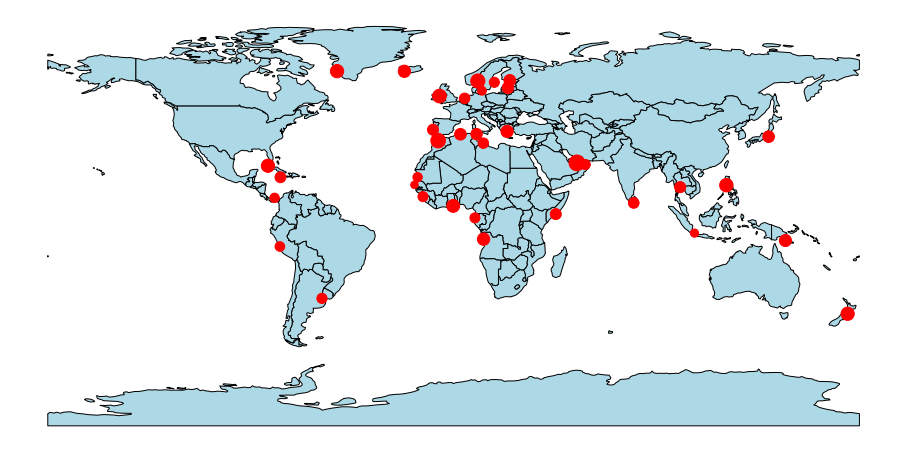

In [28]:
fig,ax = plt.subplots(figsize =(16,9))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
coastal_capitals_geo.to_crs(world.crs)
world.plot(ax = ax, color = 'lightblue', edgecolor = 'black')
coastal_capitals_geo['markersize'] = coastal_capitals_geo['avg_wspd']*10
coastal_capitals_geo.plot(ax = ax, color = 'red', markersize = 'markersize')
ax.set_axis_off()
fig.set_facecolor('white')

Độ lớn của điểm tròn tỉ lệ thuận với tốc độ gió ở địa điểm đó. Nhìn chung các thủ đô có gió nhiều tập trung ở các quốc gia nằm trên biển Địa Trung Hải và các quốc gia nằm ở phía bắc Châu Âu.

Xếp hạng các thủ đô có tốc độ gió trung bình cao nhất và có mức nhiệt độ không quá lạnh

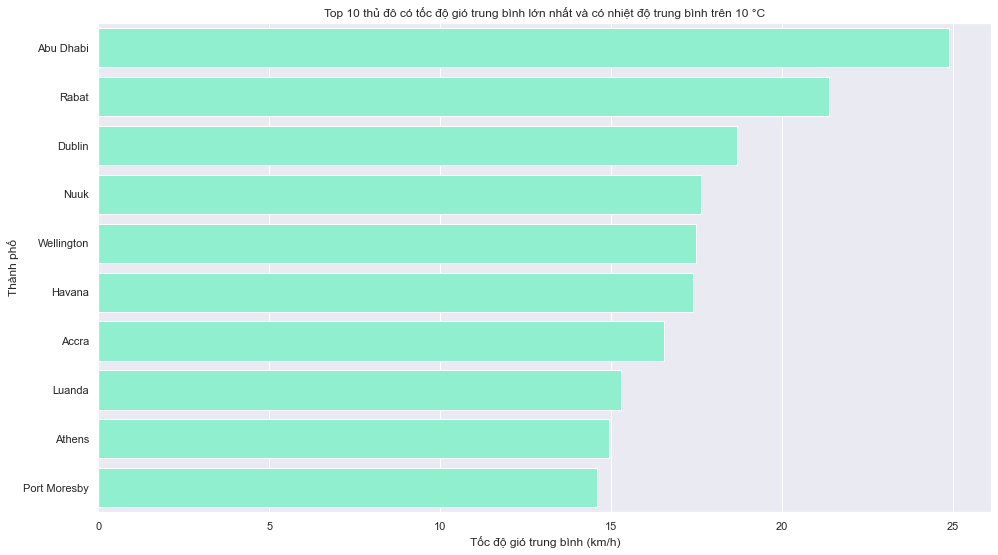

In [36]:
fig,ax = plt.subplots(figsize = (16,9))
# Only take cities having average tempurature higher than 10 °C
ideal_cities_df = coastal_capitals_df[coastal_capitals_df['avg_temp'] >= 10].sort_values(by = 'avg_wspd', ascending = False)
sns.barplot(ideal_cities_df.head(10), x = 'avg_wspd', y = 'city', ax = ax, color = 'aquamarine')
ax.set_xlabel('Tốc độ gió trung bình (km/h)')
ax.set_ylabel('Thành phố')
ax.set_title('Top 10 thủ đô có tốc độ gió trung bình lớn nhất và có nhiệt độ trung bình trên 10 °C')
fig.set_facecolor('white')

Kết luận: Abu Dhabi là thủ đô có tốc độ trung bình lớn nhất. Không những thế, đây là thủ đô của UAE - một quốc gia xa hoa và giàu có, rất phù hợp cho những người lướt sóng kết hợp với đi du lịch nghỉ dưỡng. Nếu muốn có mức chi phí rẻ hơn, các thủ đô thuộc các quốc gia nằm ở Địa Trung Hải hoặc Bắc Âu là những địa điểm có thể xem xét đến. 